# Import and setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod data
df = pd.read_csv('../data/derived/combined_data_by_year.csv', index_col=0)

In [3]:
# select columns for visualization
df = df[['year', 'country_id', 'country_txt_wb', 'country_txt_gtd', 'tourism_group', 'incident_ct_total', 'population']]

In [4]:
# add incidents per capita column
df['incidents_per_capita'] = df['incident_ct_total'] / df['population']

In [5]:
# examine dataframe
df.head()

,year,country_id,country_txt_wb,country_txt_gtd,tourism_group,incident_ct_total,population,incidents_per_capita
0,2012,5,Albania,NaN,NaN,0,2900401,0.000000e+00
1,2012,6,Algeria,Algeria,NaN,27,37383887,7.222363e-07
2,2012,7,Andorra,NaN,NaN,0,82427,0.000000e+00
3,2012,8,Angola,NaN,NaN,0,25107931,0.000000e+00
4,2012,10,Antigua and Barbuda,NaN,NaN,0,90409,0.000000e+00


# Data exploration

In [6]:
# find slices for all countries, and countries with high and low tourism
all_df  = df
high_df = df[df['tourism_group']=='high']
low_df  = df[df['tourism_group']=='low']

# define columns of interest
columns_of_interest = ['incident_ct_total', 'population', 'incidents_per_capita']

What are the distribution of incident count, population, and incident per capita in all countries?

In [7]:
# describe columns of interest for all countries
all_df[columns_of_interest].describe()

,incident_ct_total,population,incidents_per_capita
count,1078.000000,1.078000e+03,1.078000e+03
mean,15.210575,4.056657e+07,6.011824e-07
std,59.751118,1.555498e+08,2.662523e-06
min,0.000000,1.073900e+04,0.000000e+00
25%,0.000000,2.029969e+06,0.000000e+00
50%,0.000000,7.364150e+06,0.000000e+00
75%,4.000000,2.620072e+07,2.339494e-07
max,671.000000,1.392730e+09,5.632613e-05


The number of incidents range from 0 to 671. Most values are 0. The median is 0, the mean is 15, and the standard deviation of 59.75. The distribution has many low numbers with a few extremely high numbers - it is right skewed.

The populatioin ranges from 10,739 to 1,392,730,000. The median is 7,364,150, the mean is 40,566,569, and the standard deviation is 155,549,802. The distribution also has a right skew, but not as much as the number of incidents.

The incidents per capita range from 0 to 0.00005. Most values are 0. This distribution is right skewed.

# Strip plot by tourism group

In [8]:
def plot_strip_plot(column_of_interest, add_box_plot=False, show_all_countries=True):
    
    # find slices for all countries, and countries with high and low tourism
    all_df  = df
    high_df = df[df['tourism_group']=='high']
    low_df  = df[df['tourism_group']=='low']
    
    # find sample sizes
    all_df_n, high_df_n, low_df_n = ['n = ' + str(len(i)) for i in [all_df, high_df, low_df]]    
    
    # set style
    sns.set_style('whitegrid')
    
    # set number of subplots accordingly
    subplot_n = 3 if show_all_countries else 2
    
    # create figure
    fig, axs = plt.subplots(1, subplot_n, sharex=True, sharey=True, figsize=(15,5))
    fig.subplots_adjust(wspace=.05, hspace=0)

    # create strip plots
    if show_all_countries: sns.stripplot(y=column_of_interest, data=all_df,  ax=axs[0])
    sns.stripplot(y=column_of_interest, data=high_df, ax=axs[subplot_n-2])
    sns.stripplot(y=column_of_interest, data=low_df,  ax=axs[subplot_n-1])
    
    # optionally add box plots
    if add_box_plot:
        if show_all_countries: sns.boxplot(y=column_of_interest, data=all_df,  ax=axs[0], zorder=10, whis=1, color='white', showfliers=False)
        sns.boxplot(y=column_of_interest, data=high_df, ax=axs[subplot_n-2], zorder=10, whis=1, color='white', showfliers=False)
        sns.boxplot(y=column_of_interest, data=low_df,  ax=axs[subplot_n-1], zorder=10, whis=1, color='white', showfliers=False)

    # add title
    if column_of_interest == 'incidents_per_capita':
        plot_title = 'Terrorist Incidents per Capita'
    else:
        plot_title = column_of_interest
    
    # add title
    fig.suptitle(plot_title, fontsize=12, fontweight ="bold")
    
    # add subplot titles
    if show_all_countries: axs[0].set(ylabel='Count', xlabel = all_df_n,  title='All')
    axs[subplot_n-2].set(ylabel=None,    xlabel = high_df_n, title='High Tourism')
    axs[subplot_n-1].set(ylabel=None,    xlabel = low_df_n,  title='Low Tourism')

    # show plot
    plt.show()

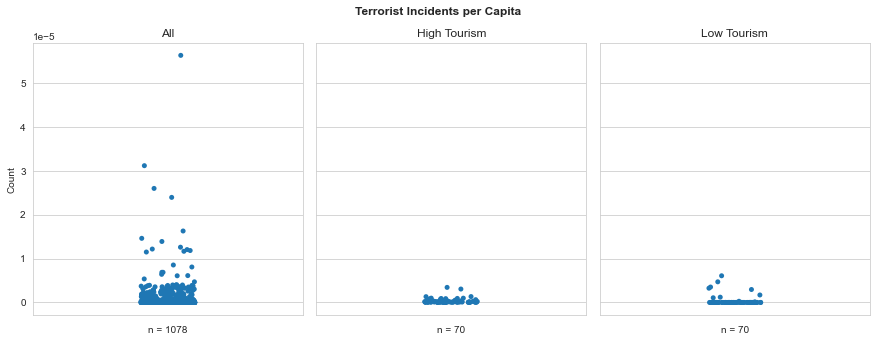

In [9]:
plot_strip_plot('incidents_per_capita', add_box_plot=False, show_all_countries=True)

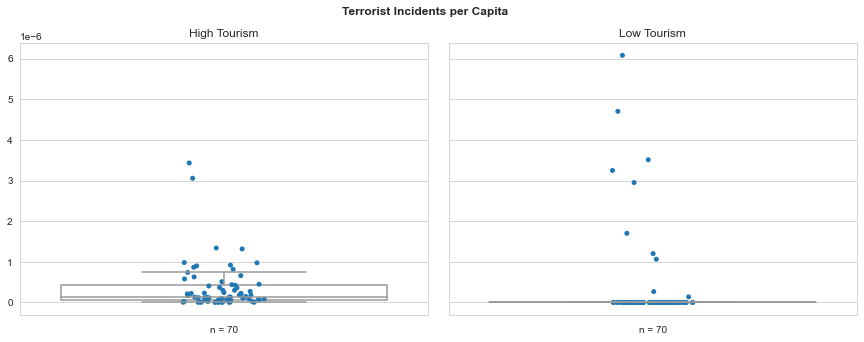

In [10]:
plot_strip_plot('incidents_per_capita', add_box_plot=True, show_all_countries=False)

# Interpretation

How many countries and years have an incident throughout the dataset?

In [11]:
sum(all_df['incident_ct_total']>0)

480

How many countries and years have no incident throughout the dataset?

In [12]:
sum(all_df['incident_ct_total']==0)

598

How many countries and years have an incident throughout the high tourism dataset?

In [13]:
sum(high_df['incident_ct_total']>0)

67

How many countries and years have no incident throughout the high tourism dataset?

In [14]:
sum(high_df['incident_ct_total']==0)

3

How many countries and years have an incident throughout the low tourism dataset?

In [15]:
sum(low_df['incident_ct_total']>0)

10

What are the countries and years that do have an incident?

In [16]:
low_df[low_df['incident_ct_total']>0]

,year,country_id,country_txt_wb,country_txt_gtd,tourism_group,incident_ct_total,population,incidents_per_capita
86,2012,123,Mali,Mali,low,17,15979499,1.063863e-06
240,2013,123,Mali,Mali,low,28,16449864,1.702142e-06
394,2014,123,Mali,Mali,low,55,16934220,3.247861e-06
548,2015,123,Mali,Mali,low,82,17438778,4.702164e-06
702,2016,123,Mali,Mali,low,53,17965429,2.950110e-06
733,2016,177,Sierra Leone,Sierra Leone,low,1,7328838,1.364473e-07
856,2017,123,Mali,Mali,low,65,18512394,3.511161e-06
887,2017,177,Sierra Leone,Sierra Leone,low,2,7488431,2.670786e-07
954,2018,46,Comoros,Comoros,low,1,832322,1.201458e-06
1010,2018,123,Mali,Mali,low,116,19077690,6.080401e-06


How many countries and years have no incident throughout the high tourism dataset?

In [17]:
sum(low_df['incident_ct_total']==0)

60

**Key takeaways:**

* In many countries and many years, there are no terrorism incidents (598 have none, 480 have incident(s)).
* In high tourism countries in most years, there are terrorist incidents (67 have incident(s), 10 have none).
* In low tourism countries in most years, there are no terrorism incidents (60 have none, 10 have incident(s)).
* The ten records with incidents in low tourism countries have higher incidents per capita than most of the records in high tourism countries. This could indicate the the few terrorism incidents in low tourism countries are more noticeable relative to the country's population - there are more incidents for a country with that size than in the high tourism grouping.